The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!


Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?
Store your answers as string variables top_gender and top_country.

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
Store this as an integer called max_decade_usa.


Which decade and Nobel Prize category combination had the highest proportion of female laureates?
Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.


Who was the first woman to receive a Nobel Prize, and in what category?
Save your string answers as first_woman_name and first_woman_category.


Which individuals or organizations have won more than one Nobel Prize throughout the years?
Store the full names in a list named repeat_list.

In [91]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv("data/nobel.csv")
nobel = df  # Fixed: assign df directly, no .Dataframe attribute

In [92]:
nobel


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='sex', ylabel='count'>

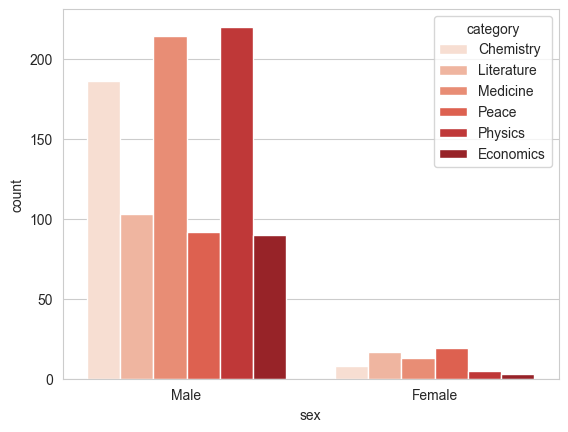

In [93]:
# Find the most common gender
top_gender = nobel['sex'].mode()[0]

# Find the most common birth country
top_country = nobel['birth_country'].mode()[0]



sns.set_style("whitegrid")
sns.set_palette('Reds')
sns.countplot(data=nobel, x='sex', hue='category')


In [94]:
top_countries = nobel.groupby("birth_country")
top_countries


C:\Users\BOOST PC\AppData\Local\Temp\ipykernel_15616\497161174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_count.values, y=top_countries_count.index, palette='husl', orient='h')


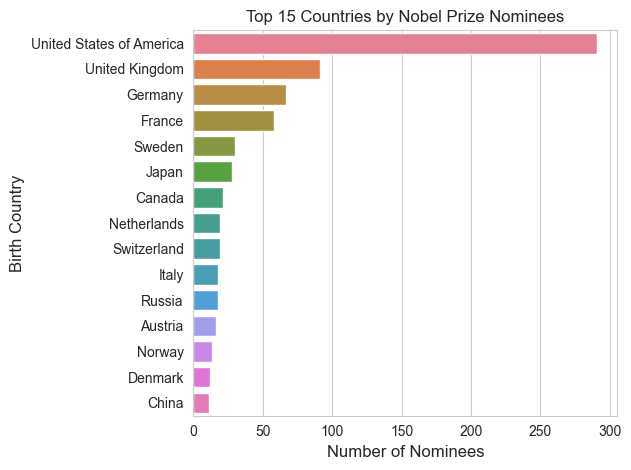

In [95]:
# Get top 15 countries by nominee count
top_countries_count = nobel['birth_country'].value_counts().head(15)

# Create a visually appealing bar plot

sns.barplot(x=top_countries_count.values, y=top_countries_count.index, palette='husl', orient='h')
plt.title('Top 15 Countries by Nobel Prize Nominees')
plt.xlabel('Number of Nominees', fontsize=12)
plt.ylabel('Birth Country', fontsize=12)
plt.tight_layout()
plt.show()

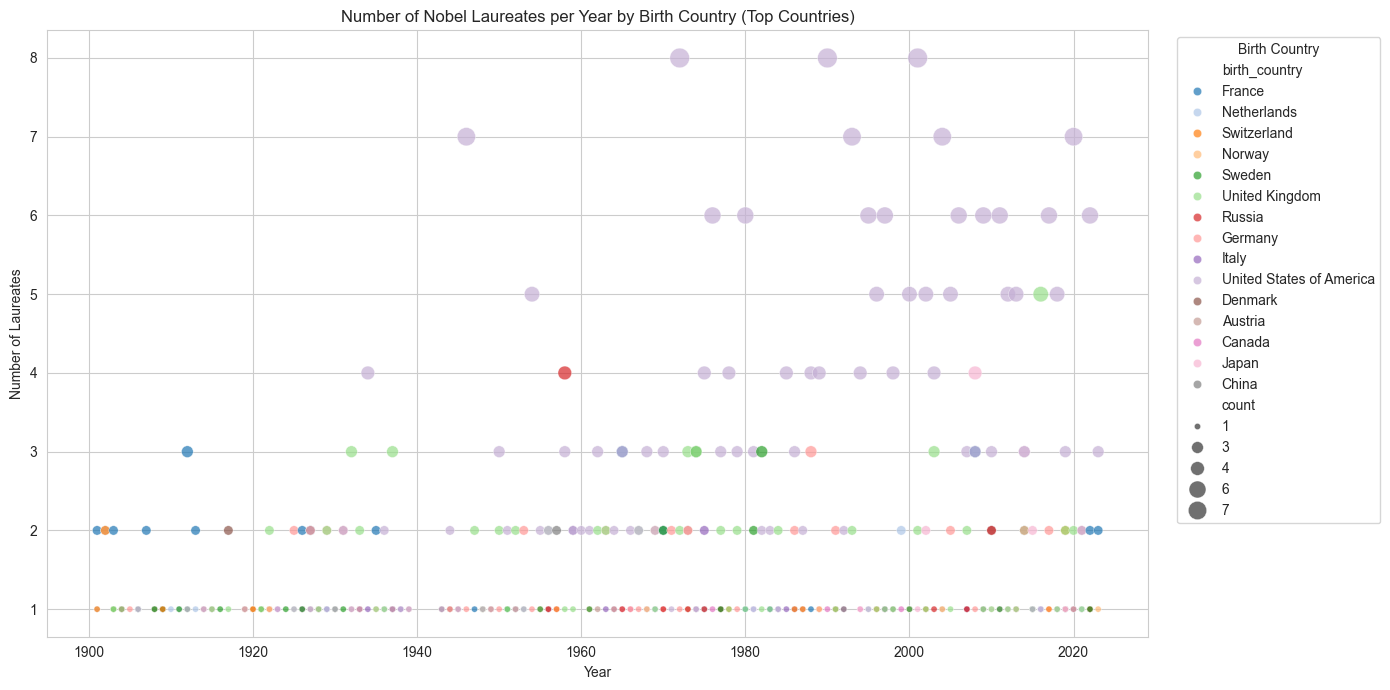

Visualization complete.


In [96]:
# Aggregate counts per year and birth_country
year_country_counts = nobel.groupby(['year', 'birth_country']).size().reset_index(name='count')

# Use previously computed top_countries_count to limit the number of countries plotted
top_countries = top_countries_count.index.tolist()  # already defined in an earlier cell
plot_df = year_country_counts[year_country_counts['birth_country'].isin(top_countries)]

plt.figure(figsize=(14,7))
sns.scatterplot(
    data=plot_df,
    x='year',
    y='count',
    hue='birth_country',
    palette='tab20',
    size='count',
    sizes=(20, 200),
    alpha=0.7,
    edgecolor='w'
)
plt.title('Number of Nobel Laureates per Year by Birth Country (Top Countries)')
plt.xlabel('Year')
plt.ylabel('Number of Laureates')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Birth Country')
plt.tight_layout()
plt.show()
print("Visualization complete.")

        total_laureates  usa_laureates  usa_ratio
decade                                           
1900                 57              1   0.017544
1910                 40              3   0.075000
1920                 54              4   0.074074
1930                 56             14   0.250000
1940                 43             13   0.302326
1950                 72             21   0.291667
1960                 79             21   0.265823
1970                104             33   0.317308
1980                 97             31   0.319588
1990                104             42   0.403846
2000                123             52   0.422764
2010                121             38   0.314050
2020                 50             18   0.360000

Decade with highest US ratio: 2000
US ratio for 2000s: 42.28%


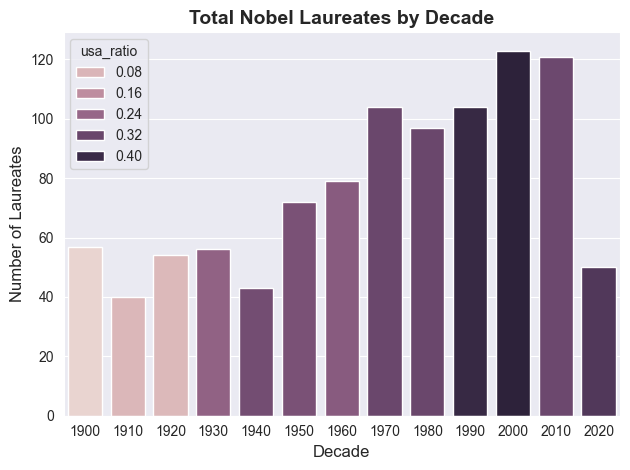

In [97]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
nobel['decade'] = (nobel['year'] // 10) * 10
usa_nobel = nobel[nobel['birth_country']=='United States of America']

# Count total laureates per decade
total_per_decade = nobel['decade'].value_counts().sort_index()

# Count USA laureates per decade
usa_per_decade = usa_nobel['decade'].value_counts().sort_index()

# Create DataFrame with relative values
decade_df = pd.DataFrame({
    'total_laureates': total_per_decade,
    'usa_laureates': usa_per_decade.fillna(0).astype(int),
})

# Calculate relative ratio (USA laureates / Total laureates)
decade_df['usa_ratio'] = decade_df['usa_laureates'] / decade_df['total_laureates']

# Find decade with highest USA ratio
max_decade_usa = int(decade_df['usa_ratio'].idxmax())

print(decade_df)
print(f"\nDecade with highest US ratio: {max_decade_usa}")
print(f"US ratio for {max_decade_usa}s: {decade_df.loc[max_decade_usa, 'usa_ratio']:.2%}")

sns.set_style('darkgrid')
sns.barplot(data=decade_df, x='decade',y='total_laureates',hue='usa_ratio')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Laureates', fontsize=12)
plt.title('Total Nobel Laureates by Decade', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

    decade    category  female_count  total_count  female_proportion
0     1900  Literature             1           10           0.100000
1     1900       Peace             1           14           0.071429
2     1900     Physics             1           13           0.076923
3     1910   Chemistry             1            8           0.125000
4     1920  Literature             2           10           0.200000
5     1930   Chemistry             1           13           0.076923
6     1930  Literature             1            9           0.111111
7     1930       Peace             1            9           0.111111
8     1940  Literature             1            6           0.166667
9     1940    Medicine             1           14           0.071429
10    1940       Peace             1            7           0.142857
11    1960   Chemistry             1           15           0.066667
12    1960  Literature             1           11           0.090909
13    1960     Physics            

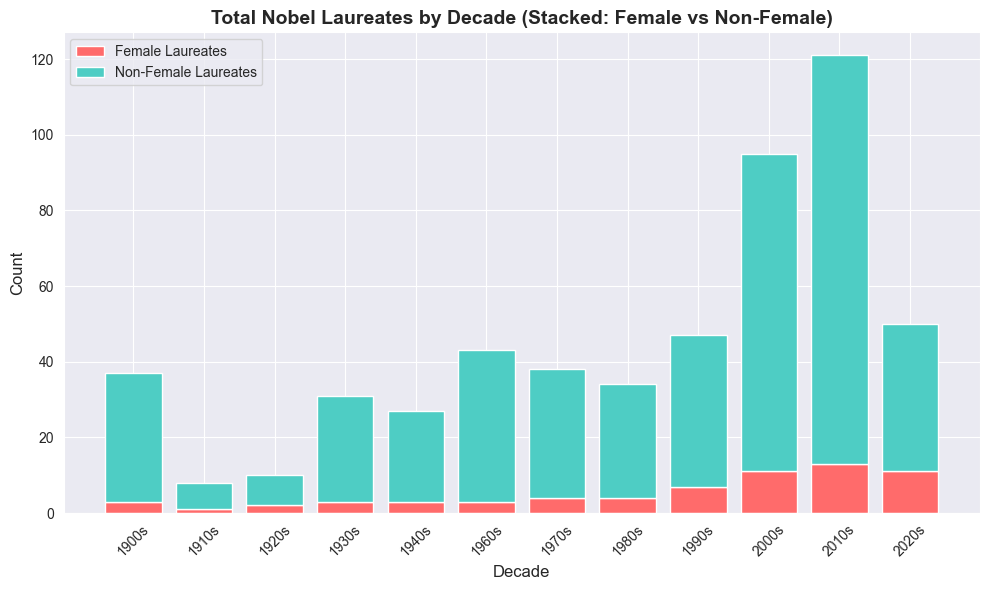

In [98]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
females = nobel[nobel['sex'] == 'Female']
females_by_decade = females.groupby(['decade','category']).size().reset_index(name='female_count')
total_by_decade_category = nobel.groupby(['decade','category']).size().reset_index(name='total_count')

decade_category_df = females_by_decade.merge(total_by_decade_category, on=['decade','category'])

decade_category_df['female_proportion'] = decade_category_df['female_count'] / decade_category_df['total_count']

max_row = decade_category_df.loc[decade_category_df['female_proportion'].idxmax()]

max_female_dict = {int(max_row['decade']): max_row['category']}

print(decade_category_df)
print(f"\nHighest female proportion: {max_row['female_proportion']:.2%} in {max_row['category']}, {max_row['decade']}s")
print(f"max_female_dict: {max_female_dict}")

# Create stacked bar chart with distinct colors
plt.figure(figsize=(10, 6))

# Prepare data for stacked bar chart
decade_summary = decade_category_df.groupby('decade')[['female_count', 'total_count']].sum().reset_index()

# Calculate non-female count
decade_summary['non_female_count'] = decade_summary['total_count'] - decade_summary['female_count']

x = np.arange(len(decade_summary))

# Stack the bars with distinct colors
plt.bar(x, decade_summary['female_count'], label='Female Laureates', color='#FF6B6B')
plt.bar(x, decade_summary['non_female_count'], bottom=decade_summary['female_count'], label='Non-Female Laureates', color='#4ECDC4')

plt.xlabel('Decade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Total Nobel Laureates by Decade (Stacked: Female vs Non-Female)', fontsize=14, fontweight='bold')
plt.xticks(x, [f"{int(d)}s" for d in decade_summary['decade']], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\BOOST PC\AppData\Local\Temp\ipykernel_15616\2115357229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_summary, x='decade', y='female_count', palette='RdPu', width=0.6)


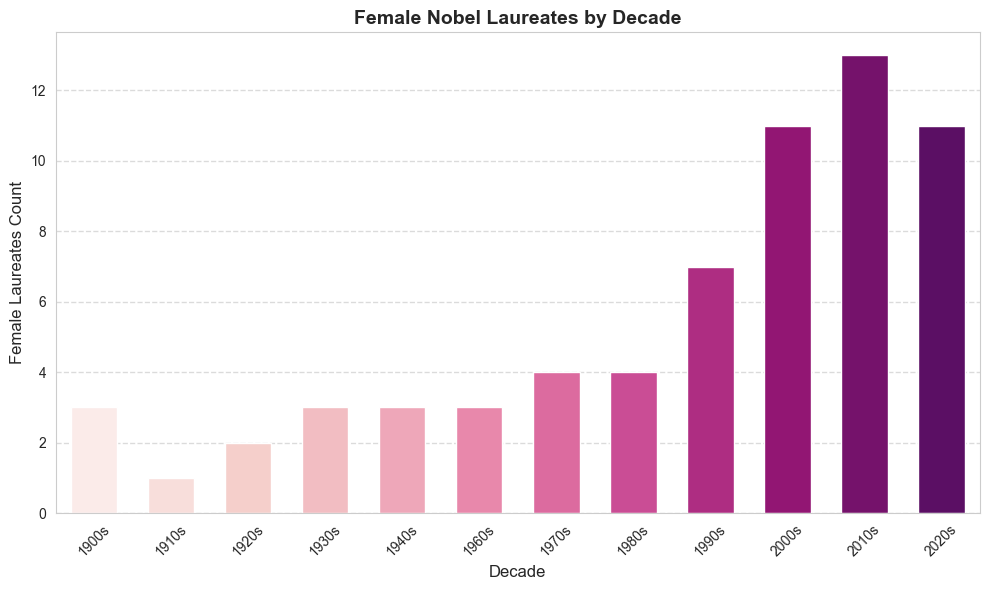

In [99]:
# Create a seaborn visualization for female laureates by decade
plt.figure(figsize=(10, 6))

sns.set_style('whitegrid')
sns.barplot(data=decade_summary, x='decade', y='female_count', palette='RdPu', width=0.6)

plt.xlabel('Decade', fontsize=12)
plt.ylabel('Female Laureates Count', fontsize=12)
plt.title('Female Nobel Laureates by Decade', fontsize=14, fontweight='bold')
plt.xticks([i for i in range(len(decade_summary))], [f"{int(d)}s" for d in decade_summary['decade']], rotation=45)
plt.grid(axis='y', alpha=0.7, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()